# Codenation - Enem 2016

Objetivo: criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

matemática: 3
ciências da natureza: 2
linguagens e códigos: 1.5
ciências humanas: 1
redação: 3
No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.



## Import libraries

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set()

%matplotlib inline
%pylab inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [7]:
path = "~/Documents/Codenation_challenge/dados/"
in_path = os.path.normcase(path + 'input/')
out_path = os.path.normcase(path+ 'output/')

In [3]:
in_path

'~\\documents\\codenation_challenge\\dados\\input\\'

In [4]:
df_enem_raw =  pd.read_csv(in_path +'train.csv')

In [5]:
df_enem_raw.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [304]:
pd.set_option('display.max_rows', df_enem_raw.describe(include = 'all').shape[1]+1)

In [305]:
df_enem_raw.isnull().sum().transpose()

Unnamed: 0                         0
NU_INSCRICAO                       0
NU_ANO                             0
CO_MUNICIPIO_RESIDENCIA            0
NO_MUNICIPIO_RESIDENCIA            0
CO_UF_RESIDENCIA                   0
SG_UF_RESIDENCIA                   0
NU_IDADE                           0
TP_SEXO                            0
TP_ESTADO_CIVIL                  528
TP_COR_RACA                        0
TP_NACIONALIDADE                   0
CO_MUNICIPIO_NASCIMENTO          609
NO_MUNICIPIO_NASCIMENTO          609
CO_UF_NASCIMENTO                 609
SG_UF_NASCIMENTO                 609
TP_ST_CONCLUSAO                    0
TP_ANO_CONCLUIU                    0
TP_ESCOLA                          0
TP_ENSINO                       9448
IN_TREINEIRO                       0
CO_ESCOLA                       9448
CO_MUNICIPIO_ESC                9448
NO_MUNICIPIO_ESC                9448
CO_UF_ESC                       9448
SG_UF_ESC                       9448
TP_DEPENDENCIA_ADM_ESC          9448
T

In [306]:
df_enem_raw.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,13730,NaN,NaN,NaN,2288.17,1321.23,0,1144,2288,3432,4586
NU_INSCRICAO,13730,13730,51fd16f53b743a012d492f6e1659c237df45033f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NU_ANO,13730,NaN,NaN,NaN,2016,0,2016,2016,2016,2016,2016
CO_MUNICIPIO_RESIDENCIA,13730,NaN,NaN,NaN,3.08855e+06,989050,1.10002e+06,2.30765e+06,3.1186e+06,3.55031e+06,5.30011e+06
NO_MUNICIPIO_RESIDENCIA,13730,2632,São Paulo,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_UF_RESIDENCIA,13730,NaN,NaN,NaN,30.7367,9.86241,11,23,31,35,53
SG_UF_RESIDENCIA,13730,27,SP,2138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NU_IDADE,13730,NaN,NaN,NaN,21.5938,7.04365,13,17,19,23,67
TP_SEXO,13730,2,F,8491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TP_ESTADO_CIVIL,13202,NaN,NaN,NaN,0.116043,0.365986,0,0,0,0,3


# Análise de dados

### DADOS DO PARTICIPANTE

In [307]:
df_enem = df_enem_raw.copy()

#### Estados

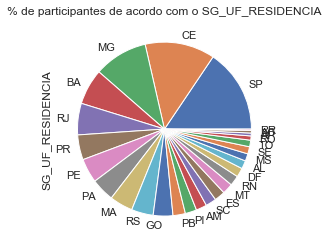

In [308]:
df_enem['SG_UF_RESIDENCIA'].value_counts(normalize=True,dropna = False).plot.pie(
    title = '% de participantes de acordo com o SG_UF_RESIDENCIA')

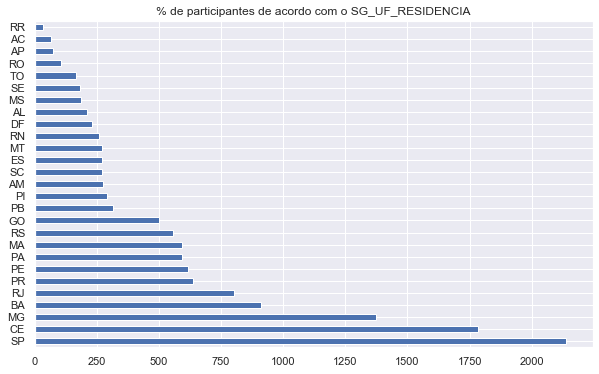

In [309]:
df_enem['SG_UF_RESIDENCIA'].value_counts().plot.barh(title = '% de participantes de acordo com o SG_UF_RESIDENCIA', 
                                                     figsize = (10,6))

#### Idade

In [310]:
df_enem['NU_IDADE'].describe().T

count    13730.000000
mean        21.593809
std          7.043654
min         13.000000
25%         17.000000
50%         19.000000
75%         23.000000
max         67.000000
Name: NU_IDADE, dtype: float64

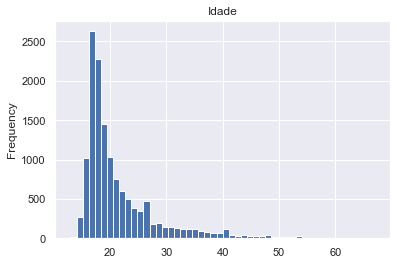

In [311]:
df_enem['NU_IDADE'].plot.hist(bins = 50, title = 'Idade')

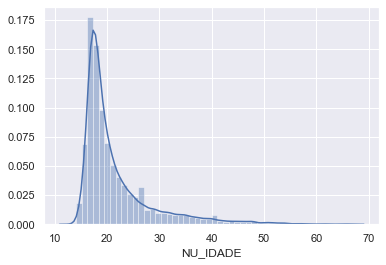

In [312]:
chart = sns.distplot(df_enem['NU_IDADE'])

#### Sexo

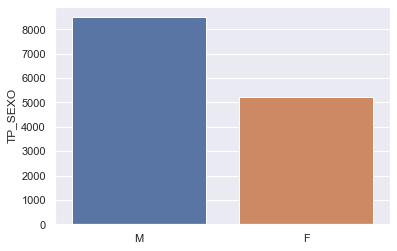

In [313]:
sexo = df_enem[u'TP_SEXO'].unique()
cont = df_enem[u'TP_SEXO'].value_counts()
sns.barplot(x=sexo,y=cont)

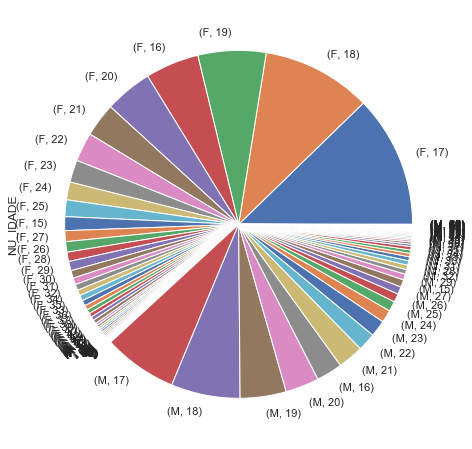

In [314]:
pd.Series(df_enem.groupby(['TP_SEXO'])['NU_IDADE'].value_counts()).plot.pie(figsize = (10,8))

#### Situação de Conclusão do Ensino Médio  

[]

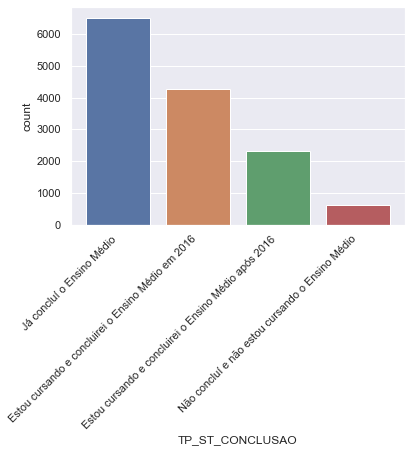

In [315]:
dic_situacao_conclusao={
1:'Já concluí o Ensino Médio',
2:'Estou cursando e concluirei o Ensino Médio em 2016',
3:'Estou cursando e concluirei o Ensino Médio após 2016',
4:'Não concluí e não estou cursando o Ensino Médio',
}
temp_situacao_conclusao = df_enem['TP_ST_CONCLUSAO'].map(dic_situacao_conclusao)
chart = sns.countplot(x = temp_situacao_conclusao, data = df_enem)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.plot()

#### Ano de conclusão

[]

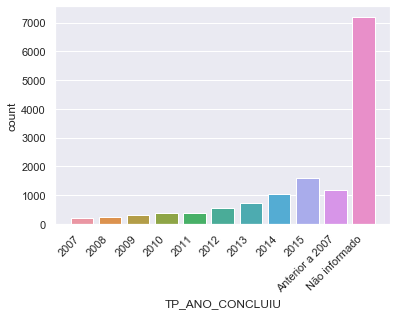

In [316]:
dic_ano_conc = { 
0:'Não informado',
1:'2015',
2:'2014',
3:'2013',
4:'2012',
5:'2011',
6:'2010',
7:'2009',
8:'2008',
9:'2007',
10:'Anterior a 2007'}

temp_ano_conc = df_enem['TP_ANO_CONCLUIU'].map(dic_ano_conc)

chart = sns.countplot(data = df_enem, x =temp_ano_conc.sort_values(ascending=True))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.plot()

#### Tipo de escola que cursou Ensino médio

In [317]:
df_enem['TP_ESCOLA'].value_counts(dropna=False)

1    9447
2    3713
3     569
4       1
Name: TP_ESCOLA, dtype: int64

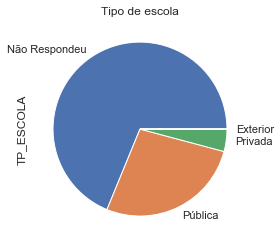

In [318]:
dic_tipo_escola = {
1:'Não Respondeu',
2:'Pública',
3:'Privada',
4:'Exterior'}
temp_tipo_escola= df_enem['TP_ESCOLA'].map(dic_tipo_escola)
temp_tipo_escola.value_counts(normalize=True,dropna = False).plot.pie(title = 'Tipo de escola')

### Tipo de ensino

In [319]:
df_enem['TP_ENSINO'].value_counts(dropna = False)

NaN    9448
1.0    3886
3.0     370
2.0      26
Name: TP_ENSINO, dtype: int64

[]

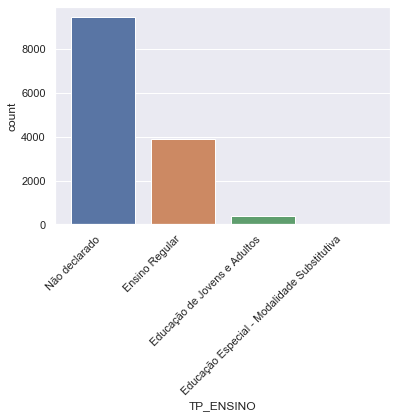

In [320]:
dic_ensino = {
1:'Ensino Regular',
2:'Educação Especial - Modalidade Substitutiva',
3:'Educação de Jovens e Adultos',
np.nan: 'Não declarado'}

temp_ensino = df_enem['TP_ENSINO'].map(dic_ensino)
chart = sns.countplot(data=df_enem, x = temp_ensino)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.plot()

#### Candidato que fez a prova com intuito de apenas treinar seus conhecimentos

In [321]:
df_enem['IN_TREINEIRO'].value_counts(dropna=False)

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

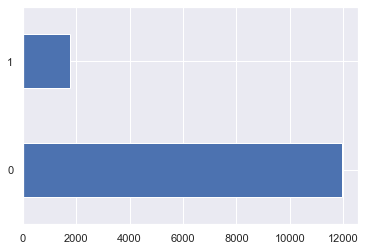

In [322]:
df_enem['IN_TREINEIRO'].value_counts().plot.barh()

#### Estado civil

[]

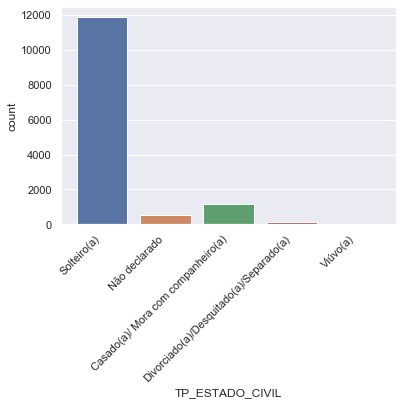

In [323]:
dic_estado_civil = {
0 : 'Solteiro(a)',
1 : 'Casado(a)/ Mora com companheiro(a)',
2 : 'Divorciado(a)/Desquitado(a)/Separado(a)', 
3 : 'Viúvo(a)',
np.nan : 'Não declarado'}
temp_estado_civil = df_enem['TP_ESTADO_CIVIL'].map(dic_estado_civil)

#chart = sns.barplot(x=temp_estado_civil.unique(), y=temp_estado_civil.value_counts(dropna=False))
chart = sns.countplot(x=temp_estado_civil, data=df_enem)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.plot()

In [324]:
temp_estado_civil.unique()

array(['Solteiro(a)', 'Não declarado',
       'Casado(a)/ Mora com companheiro(a)',
       'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'],
      dtype=object)

#### Nacionalidade

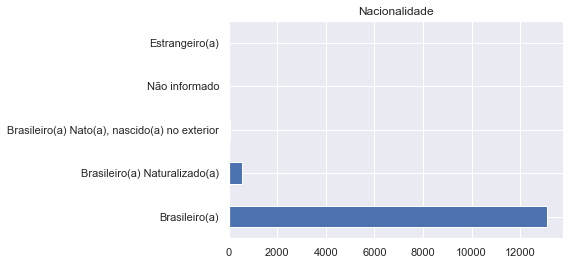

In [325]:
dic_nac = {
0 : 'Não informado',
1 : 'Brasileiro(a)',
2 : 'Brasileiro(a) Naturalizado(a)', 
3 : 'Estrangeiro(a)',
4 : 'Brasileiro(a) Nato(a), nascido(a) no exterior'}

df_enem['TP_NACIONALIDADE'].map(dic_nac).value_counts().plot.barh(title = 'Nacionalidade')

In [326]:
dic_raca = {
0:'Não declarado',
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela', 
5:'Indígena', 
6:'Não dispõe da informação'}
temp_raca = df_enem['TP_COR_RACA'].map(dic_raca)

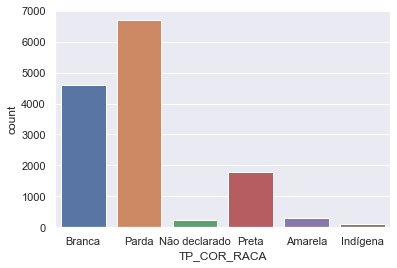

In [327]:
sns.countplot(x = temp_raca, data = df_enem)

In [328]:
municipios = pd.read_excel(in_path+'municipios_brasil.xls',encoding='latin1')
municipios.head()

,GEOCODIGO_MUNICIPIO,NOME_MUNICIPIO,LONGITUDE,LATITUDE
0,1100015,ALTA FLORESTA D'OESTE,-61.999824,-11.935540
1,1100023,ARIQUEMES,-63.033269,-9.908463
2,1100031,CABIXI,-60.544314,-13.499763
3,1100049,CACOAL,-61.442944,-11.433865
4,1100056,CEREJEIRAS,-60.818426,-13.195033


``` python
import folium
from folium import plugins

# Especificando a localização, o valor de zoom e o tipo do mapa:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=0.5,tiles='Stamen Toner')
coordenadas=[]
# Limitando o número de registros para não travar a máquina:
for cid in (df_enem.CO_MUNICIPIO_RESIDENCIA[:20000]):
    # Pegando os valores de longitude e latitude das duas bases:
    lat = (municipios[municipios['GEOCODIGO_MUNICIPIO'] == cid]['LATITUDE'].values)
    long = (municipios[municipios['GEOCODIGO_MUNICIPIO'] == cid]['LONGITUDE'].values)
    if lat != '' and long != '':
# Tratando os valores de lat e log:
        try:
            lat = float(str(lat).replace('[','').replace(']',''))
            long = float(str(long).replace('[','').replace(']',''))
            coordenadas.append([lat,long])
        except:
            print(cid)
            
```

``` python
# Alimentando o mapa com as coordenadas fornecidas pelo código anterior:
mapa.add_child(plugins.HeatMap(coordenadas))    
mapa.save('mapa-consumidor.html')
mapa
```

DADOS DO PARTICIPANTE

In [329]:
df_enem.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [330]:
df_enem = df_enem_raw.drop(['Unnamed: 0','NU_INSCRICAO','NU_ANO',
                            'TP_ANO_CONCLUIU','TP_ESTADO_CIVIL',
                            'CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA', 
                            'CO_MUNICIPIO_NASCIMENTO','SG_UF_NASCIMENTO','TP_NACIONALIDADE',
                            'NO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO','TP_ENSINO', 'TP_ESCOLA'], axis =1).copy()

df_enem['TP_SEXO'] = df_enem['TP_SEXO'].map({'M':0,'F':1})

DADOS DA ESCOLA

In [331]:
df_enem.drop(columns = list(df_enem.loc[:,'CO_ESCOLA':'TP_SIT_FUNC_ESC'].columns), inplace = True)

DADOS DOS PEDIDOS DE ATENDIMENTO ESPECIALIZADO

In [332]:
df_enem.loc[:,'IN_BAIXA_VISAO':'IN_OUTRA_DEF'].sum(axis=0)

IN_BAIXA_VISAO             17
IN_CEGUEIRA                 0
IN_SURDEZ                   5
IN_DEFICIENCIA_AUDITIVA     7
IN_SURDO_CEGUEIRA           0
IN_DEFICIENCIA_FISICA      30
IN_DEFICIENCIA_MENTAL       2
IN_DEFICIT_ATENCAO         13
IN_DISLEXIA                 1
IN_DISCALCULIA              1
IN_AUTISMO                  0
IN_VISAO_MONOCULAR          6
IN_OUTRA_DEF                7
dtype: int64

DADOS DOS PEDIDOS DE ATENDIMENTO ESPECÍFICO

In [333]:
df_enem.loc[:,'IN_SABATISTA':'IN_ESTUDA_CLASSE_HOSPITALAR'].sum(axis=0)

IN_SABATISTA                   133
IN_GESTANTE                     13
IN_LACTANTE                     22
IN_IDOSO                         2
IN_ESTUDA_CLASSE_HOSPITALAR      0
dtype: int64

In [334]:
df_enem.drop(columns = ['IN_SABATISTA'], inplace=True)

In [335]:
df_enem['IN_ESPECIAL'] = (df_enem.loc[:,'IN_BAIXA_VISAO':'IN_ESTUDA_CLASSE_HOSPITALAR'].sum(axis=1)).apply(lambda x: 1 if x>=1 else 0)

In [336]:
df_enem.drop(columns = list(df_enem.loc[:,'IN_BAIXA_VISAO':'IN_ESTUDA_CLASSE_HOSPITALAR'].columns), inplace=True)

DADOS DOS PEDIDOS DE RECURSOS ESPECIALIZADOS E ESPECÍFICOS PARA REALIZAÇÃO DAS PROVAS

In [337]:
df_enem.drop(columns = list(df_enem.loc[:, 'IN_SEM_RECURSO': 'IN_NOME_SOCIAL'].columns), inplace = True)

DADOS DOS PEDIDOS DE CERTIFICAÇÃO DO ENSINO MÉDIO \
- IN_CERFIFICADO - Indicador de solicitação de certificação no Ensino Médio7

In [338]:
list_certificado = ['IN_CERTIFICADO', 'NO_ENTIDADE_CERTIFICACAO', 'CO_UF_ENTIDADE_CERTIFICACAO', 'SG_UF_ENTIDADE_CERTIFICACAO']

In [339]:
df_enem.drop(columns = list_certificado, inplace = True)

DADOS DO LOCAL DE APLICAÇÃO DA PROVA

In [340]:
df_enem.drop(columns = list(df_enem.loc[:, 'CO_MUNICIPIO_PROVA': 'SG_UF_PROVA'].columns), inplace = True)

DADOS DA PROVA OBJETIVA + REDAÇÃO

In [341]:
df_enem.loc[:,'TP_PRESENCA_CN':'NU_NOTA_REDACAO'].head(3)

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,...,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0
1,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,...,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,140.0,120.0,120.0,120.0,80.0,580.0
2,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


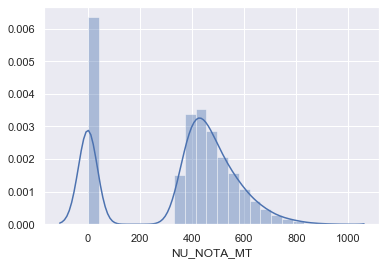

In [342]:
sns.distplot(df_enem['NU_NOTA_MT'].fillna(0))

DADOS DA REDAÇÃO

[]

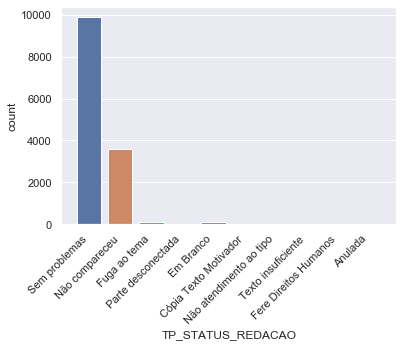

In [343]:
dic_estado_redac = {
1:'Sem problemas',
2:'Anulada',
3:'Cópia Texto Motivador',
4:'Em Branco',
5:'Fere Direitos Humanos',
6:'Fuga ao tema',
7:'Não atendimento ao tipo',
8:'Texto insuficiente',
9:'Parte desconectada',
np.nan: 'Não compareceu'
}
temp_estado_redac = df_enem['TP_STATUS_REDACAO'].map(dic_estado_redac)
chart = sns.countplot(x=temp_estado_redac, data=df_enem)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.plot()

In [344]:
df_enem.loc[:,'TP_PRESENCA_CN':'NU_NOTA_REDACAO'].columns

Index(['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [345]:
dic_status_redacao = {np.nan : 0, 1:1, 2:-1, 3:-1, 4:-1, 5:-1, 6:-1, 7:-1, 8:-1, 9:-1}

df_enem['TP_STATUS_REDACAO'] = df_enem['TP_STATUS_REDACAO'].map(dic_status_redacao)

In [346]:
df_enem[(df_enem['TP_PRESENCA_CN'] == 0)][['NU_NOTA_CN', 'NU_NOTA_CH',
                                           'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].notnull().sum(axis=0)

NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC         32
NU_NOTA_MT         32
NU_NOTA_REDACAO    32
dtype: int64

In [347]:
df_enem[ (df_enem['TP_PRESENCA_LC'] == 0)][['NU_NOTA_CN', 'NU_NOTA_CH',
                                            'NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO']].notnull().sum(axis=0)

NU_NOTA_CN         239
NU_NOTA_CH         239
NU_NOTA_LC           0
NU_NOTA_MT           0
NU_NOTA_REDACAO      0
dtype: int64

Não compareceram - DROP

In [348]:
df_enem[(df_enem['TP_PRESENCA_CN'] == 0) & (df_enem['TP_PRESENCA_LC'] == 0)][['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC',
                                                                              'NU_NOTA_MT', 'NU_NOTA_REDACAO']].isnull().sum(axis=0)

NU_NOTA_CN         3348
NU_NOTA_CH         3348
NU_NOTA_LC         3348
NU_NOTA_MT         3348
NU_NOTA_REDACAO    3348
dtype: int64

In [349]:
df_enem.loc[(df_enem['TP_PRESENCA_CN'] == 2), 'TP_PRESENCA_CN'] = 0
df_enem.loc[(df_enem['TP_PRESENCA_LC'] == 2), 'TP_PRESENCA_LC'] = 0

df_enem['TP_PRESENCA'] = df_enem[['TP_PRESENCA_CN',
                                  'TP_PRESENCA_LC']].sum(axis = 1)

In [350]:
df_enem[['NU_NOTA_CN','NU_NOTA_CH',
         'NU_NOTA_LC','NU_NOTA_REDACAO']] = df_enem[['NU_NOTA_CN','NU_NOTA_CH',
                                                     'NU_NOTA_LC','NU_NOTA_REDACAO']].fillna(0)
df_enem['NU_NOTA_MED'] = df_enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].sum(axis=1)/4

In [351]:
df_enem.loc[:,'NU_NOTA_CN':'NU_NOTA_MT'].isnull().sum()

NU_NOTA_CN       0
NU_NOTA_CH       0
NU_NOTA_LC       0
NU_NOTA_MT    3597
dtype: int64

In [352]:
df_enem['NU_NOTA_MT'] = df_enem['NU_NOTA_MT'].fillna(0)

In [353]:
list_a = list(df_enem.loc[:,'TP_PRESENCA_CN':'NU_NOTA_REDACAO'].columns)
list_b = ['TP_STATUS_REDACAO','NU_NOTA_MT']
[list_a.remove(x) for x in list_b] 

[None, None]

In [354]:
df_enem.drop(columns = list_a, inplace = True)

In [355]:
df_enem.head(3)

,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,NU_NOTA_MT,TP_STATUS_REDACAO,Q001,Q002,...,Q044,Q045,Q046,Q047,Q048,Q049,Q050,IN_ESPECIAL,TP_PRESENCA,NU_NOTA_MED
0,43,24,0,1,1,0,399.4,1,D,D,...,A,A,A,A,A,B,D,0,2,508.225
1,23,17,1,3,2,0,459.8,1,A,A,...,C,A,B,A,A,C,A,0,2,549.400
2,23,21,1,3,3,0,0.0,0,D,D,...,A,A,C,A,A,B,A,0,0,0.000


DADOS DO QUESTIONÁRIO SOCIOECONÔMICO

In [356]:
df_enem.loc[:,'Q001':'Q050'].head(3)

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,D,D,B,B,3,C,A,B,B,B,...,5.0,A,A,A,A,A,A,A,B,D
1,A,A,A,A,5,B,A,B,B,A,...,NaN,A,A,C,A,B,A,A,C,A
2,D,D,B,B,4,C,A,B,C,A,...,NaN,A,A,A,A,C,A,A,B,A


'Q001' Até que série seu pai, ou o homem responsável por você, estudou?\
'Q002' Até que série sua mãe, ou a mulher responsável por você, estudou?

A	Nunca estudou. \
B	Não completou a 4ª série/5º ano do Ensino Fundamental. \
C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. \
D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\
E	Completou o Ensino Médio, mas não completou a Faculdade.\
F	Completou a Faculdade, mas não completou a Pós-graduação.\
G	Completou a Pós-graduação.\
H	Não sei.


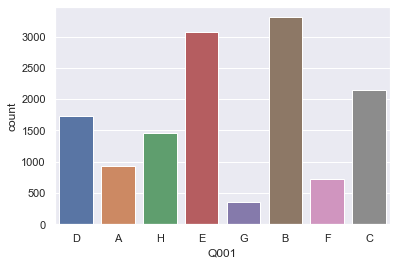

In [357]:
sns.countplot(x = df_enem['Q001'], data = df_enem)

In [358]:
dic_q1_q2 ={
'A':0,
'B':1,
'C':2,
'D':3,
'E':4,
'F':5,
'G':6,
'H':-1}

df_enem['Q001_2'] = df_enem['Q001'].map(dic_q1_q2)

'Q005' Incluindo você, quantas pessoas moram atualmente em sua residência?

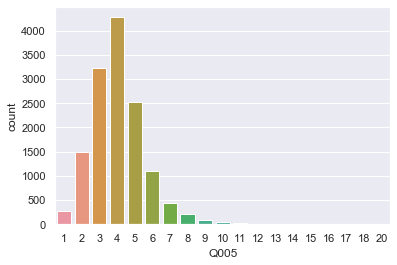

In [275]:
sns.countplot(x = df_enem['Q005'], data = df_enem)

Q006	Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.) \
A)	Nenhuma renda. \
B)	AtéRS 880,00. \
C)	De RS 880,01 até RS 1.320,00. \
D)	De RS 1.320,01 até RS 1.760,00. \
E)	De RS 1.760,01 até RS 2.200,00. \
F)	De RS 2.200,01 até RS 2.640,00. \
G)	De RS 2.640,01 até RS 3.520,00. \
H)	De RS 3.520,01 até RS 4.400,00. \
I)	De RS 4.400,01 até RS 5.280,00. \
J)	De RS 5.280,01 até RS 6.160,00. \
K)	De RS 6.160,01 até RS 7.040,00. \
L)	De RS 7.040,01 até RS 7.920,00. \
M)	De RS 7.920,01 até RS 8.800,00. \
N)	De RS 8.800,01 até RS 10.560,00. \
O)	De RS 10.560,01 até RS 13.200,00. \
P)	De RS 13.200,01 até RS 17.600,00. \
Q)	Mais de RS 17.600,00.

In [359]:
dic_renda = {
'A':0,
'B':1,
'C':2,
'D':3,
'E':4,
'F':5,
'G':6,
'H':7,
'I':8,
'J':9,
'K':10,
'L':11,
'M':12,
'N':13,
'O':14,
'P':15,
'Q':16
}

df_enem['Q006'] =df_enem['Q006'].map(dic_renda)

Q025	Na sua residência tem acesso à Internet?

In [360]:
df_enem['Q025']=df_enem['Q025'].map({'A':1, 'B':0})

Q047 \
Em que tipo de escola você frequentou o Ensino Médio? \
A	Somente em escola pública.\
B	Parte em escola pública e parte em escola privada sem bolsa de estudo integral.\
C	Parte em escola pública e parte em escola privada com bolsa de estudo integral.\
D	Somente em escola privada sem bolsa de estudo integral.\
E	Somente em escola privada com bolsa de estudo integral.\

In [361]:
df_enem = pd.concat([df_enem,pd.get_dummies(df_enem['Q047'], drop_first =True, prefix = 'Q047')], axis =1)

In [362]:
list_a = list(df_enem.loc[:,'Q001':'Q050'].columns)
list_b = ['Q006', 'Q025']
[list_a.remove(x) for x in list_b]

[None, None]

In [363]:
df_enem.drop(columns = list_a, inplace = True)

In [379]:
df_enem.columns 

Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'IN_TREINEIRO', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
       'Q006', 'Q025', 'IN_ESPECIAL', 'TP_PRESENCA', 'NU_NOTA_MED', 'Q001_2',
       'Q047_B', 'Q047_C', 'Q047_D', 'Q047_E'],
      dtype='object')

In [380]:
df_enem.to_csv('train_preproc.csv', index = False)

In [365]:
df_enem.describe().T

,count,mean,std,min,25%,50%,75%,max
CO_UF_RESIDENCIA,13730.0,30.736708,9.862405,11.0,23.00,31.0,35.00,53.0
NU_IDADE,13730.0,21.593809,7.043654,13.0,17.00,19.0,23.00,67.0
TP_SEXO,13730.0,0.618427,0.485790,0.0,0.00,1.0,1.00,1.0
TP_COR_RACA,13730.0,2.185652,1.007285,0.0,1.00,3.0,3.00,5.0
TP_ST_CONCLUSAO,13730.0,1.782666,0.880734,1.0,1.00,2.0,2.00,4.0
IN_TREINEIRO,13730.0,0.129862,0.336163,0.0,0.00,0.0,0.00,1.0
NU_NOTA_MT,13730.0,356.092607,228.844193,0.0,0.00,422.5,504.40,952.0
TP_STATUS_REDACAO,13730.0,0.702913,0.493912,-1.0,0.00,1.0,1.00,1.0
Q006,13730.0,2.975892,2.773124,0.0,1.00,2.0,4.00,16.0
Q025,13730.0,0.430808,0.495207,0.0,0.00,0.0,1.00,1.0


In [366]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm = scaler.fit(df_enem)
df_enem_norm= pd.DataFrame(norm.transform(df_enem), columns = list(df_enem.columns) )

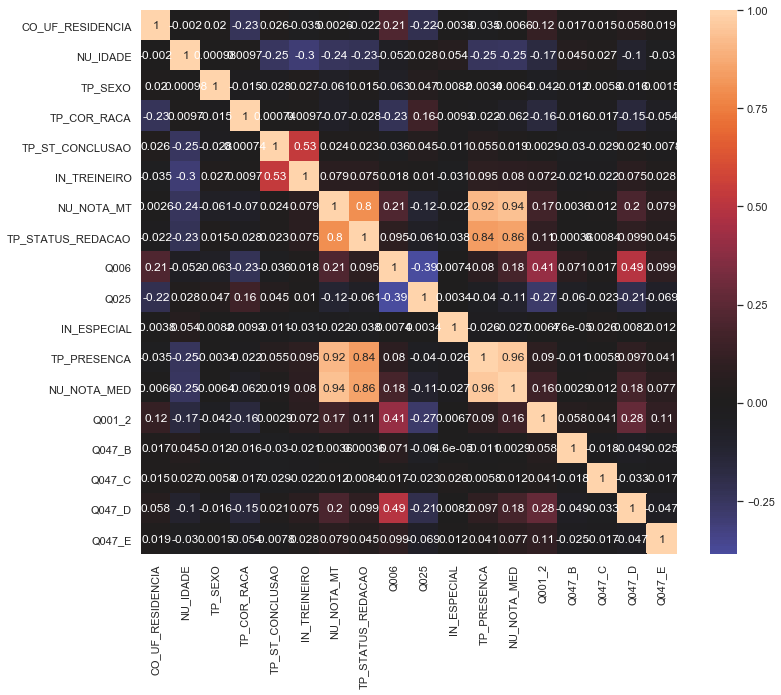

In [367]:
ax = plt.figure(figsize=(12, 10))
ax = sns.heatmap(df_enem_norm.corr(),center=0, annot = True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [368]:
y = df_enem['NU_NOTA_MT']
x = df_enem.copy().drop('NU_NOTA_MT', axis=1)

In [369]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [287]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm

In [938]:
x_train = sm.add_constant(x_train) ## let's add an intercept (beta_0) to our model

In [1023]:
model = sm.OLS(y_train,x_train)
results = model.fit() 

In [1061]:
results.params

CO_UF_RESIDENCIA      0.355512
NU_IDADE              0.100288
TP_SEXO             -23.985367
TP_ESTADO_CIVIL       0.782926
TP_COR_RACA          -2.518533
TP_ST_CONCLUSAO      -0.824368
TP_ANO_CONCLUIU       0.489910
TP_ESCOLA             7.501516
IN_TREINEIRO          7.781822
TP_STATUS_REDACAO    28.480048
TP_PRESENCA           2.491477
IN_ESPECIAL           4.462307
NU_NOTA_MED           0.849119
dtype: float64

In [1048]:
y_hat = list(sum([list(results.params)[x]*x_train.iloc[:,x] for x in range(len(list(results.params)))], axis=0))

In [1004]:
predictions = results.predict(x_test) # make the predictions by the model

In [1005]:
len(y_train)

10984

In [1020]:
np.sqrt(((predictions-y_test)**2).mean())

73.27362431308158

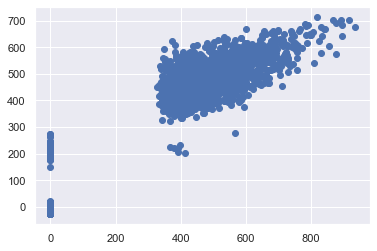

In [1010]:
plt.scatter(y = predictions, x = y_test)

In [1028]:
sm.OLS?

In [989]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             NU_NOTA_MT   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          2.608e+04
Date:                Sun, 29 Mar 2020   Prob (F-statistic):                        0.00
Time:                        08:55:23   Log-Likelihood:                         -62986.
No. Observations:               10984   AIC:                                  1.260e+05
Df Residuals:                   10971   BIC:                                  1.261e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CO_UF_RESIDENCIA      0.3555      0.070      5.112      0.000       0.219       0.492
NU_IDADE              0.1003      0.147      0.681      0.496      -0.189       0.389
TP_SEXO             -23.9854      1.456    -16.474      0.000     -26.839     -21.132
TP_ESTADO_CIVIL       0.7829      1.811      0.432      0.665      -2.766       4.332
TP_COR_RACA          -2.5185      0.671     -3.752      0.000      -3.834      -1.203
TP_ST_CONCLUSAO      -0.8244      1.263     -0.653      0.514      -3.300       1.651
TP_ANO_CONCLUIU       0.4899      0.409      1.199      0.230      -0.311       1.291
TP_ESCOLA             7.5015      1.499      5.005      0.000       4.563      10.440
IN_TREINEIRO          7.7818      2.958      2.631      0.009       1.984      13.579
TP_STATUS_REDACAO    28.4800      1.194     23.844      0.000      26.139      30.821
TP_PRESENCA           2.4915      0.748      3.331      0.001       1.025       3.958
IN_ESPECIAL           4.4623      8.119      0.550      0.583     -11.452      20.377
NU_NOTA_MED           0.8491      0.010     84.449      0.000       0.829       0.869
==============================================================================
Omnibus:                      509.835   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1821.804
Skew:                          -0.016   Prob(JB):                         0.00
Kurtosis:                       4.995   Cond. No.                     5.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [291]:
x_train.shape, x_test.shape

((10984, 17), (2746, 17))

In [292]:
y_train = np.array(y_train).reshape(-1,1)

In [293]:
lm = linear_model.LinearRegression()
model = lm.fit(y_train,x_train)

In [294]:
predictions = lm.predict(x_test)
lm.score(x_test,y_test)

ValueError: shapes (2746,17) and (1,17) not aligned: 17 (dim 1) != 1 (dim 0)

In [954]:
lm.coef_, lm.intercept_

(array([[ 1.80265024e-04],
        [-7.59678144e-03],
        [-1.45486484e-04],
        [-1.76946973e-04],
        [-3.19496786e-04],
        [ 8.27368077e-05],
        [-2.68616149e-03],
        [ 4.62576112e-04],
        [ 1.19883823e-04],
        [ 8.47278759e-01],
        [ 9.36658755e-01],
        [ 9.67395744e-01],
        [ 1.90598168e-03],
        [ 1.02377354e+00],
        [ 1.37503571e-02],
        [ 4.37973162e-07]]),
 array([ 3.06683978e+01,  2.43003099e+01,  6.66736565e-01,  1.35593100e-01,
         2.29964631e+00,  1.75889809e+00,  3.07731054e+00,  1.19243040e+00,
         8.80916298e-02,  5.50645902e+01,  6.50023673e+01,  3.64384675e+01,
         1.35659513e-01,  2.54944395e+01, -2.93558050e+00,  6.76336330e-03]))

In [370]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()
model = xgb_reg.fit(x_train, y_train)
ypred = model.predict(x_test)
model.score(x_test, y_test)

0.9168784366583786

Cross-validated scores: [0.91415489 0.91185534 0.9085929  0.9110454  0.92070495 0.90532999]


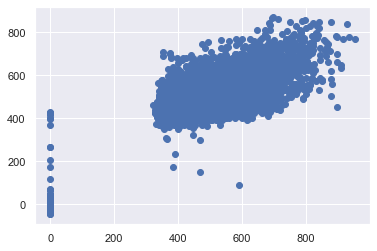

In [371]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV


# Perform 6-fold cross validation
scores = cross_val_score(model, x, y, cv=6)
print ('Cross-validated scores:', scores)
    
# Make cross validated predictions
predictions = cross_val_predict(model, x, y, cv=6)
plt.scatter(y, predictions)

In [372]:
reg_pipeline = make_pipeline(preprocessing.StandardScaler(), xgb.XGBRegressor(max_depth=3))
scores = cross_val_score(reg_pipeline, x, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.91993409 0.91663641 0.91597766 0.91527969 0.92696704 0.91182276]


In [378]:
scores.mean()

0.9177696086205174

In [375]:
parametros_grid

NameError: name 'parametros_grid' is not defined

In [376]:
# Parâmetros para fazer o grid
parametros_grid = dict(max_depth=[3,4,5,6,7,8,9,10])

# Cria objeto gridsearch com os parâmetros definidos e a configuração de validação cruzada com 5 folds
grid = GridSearchCV(reg_pipeline, param_grid=parametros_grid, cv=6, scoring='accuracy')

In [377]:
grid.fit(x,y)

ValueError: Invalid parameter max_depth for estimator Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, gamma=None, gpu_id=None,
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=3,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              objective='reg:squarederror', random_state=None,
                              reg_alpha=None, reg_lambda=None,
                              scale_pos_weight=None, subsample=None,
                              tree_method=None, validate_parameters=False,
                              verbosity=None))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [1095]:
xgb.XGBRegressor().get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [1078]:
grid.cv_results_ 

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [1077]:
grid.best_estimator_

In [1075]:
grid.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:

def pd_of_stats(df,col):
    '''
    Create a dataframe of descriptive Statistics
    '''
    stats = dict()
    stats['Mean']  = df[col].mean()
    stats['Std']   = df[col].std()
    stats['Var'] = df[col].var()
    stats['Kurtosis'] = df[col].kurtosis()
    stats['Skewness'] = df[col].skew()
    stats['CoefVar'] = stats['Std'] / stats['Mean']
    
    return pd.DataFrame(stats, index = col).T.round(2)


def pd_of_stats_quantile(df,col):
    '''
    Create a dataframe of quantile Statistics
    '''
    df_no_na = df[col].dropna()
    stats_q = dict()

    stats_q['Min'] = df[col].min()
    label = {0.25:"Q1", 0.5:'Median', 0.75:"Q3"}
    for percentile in np.array([0.25, 0.5, 0.75]):
        stats_q[label[percentile]] = df_no_na.quantile(percentile)
    stats_q['Max'] = df[col].max()
    stats_q['Range'] = stats_q['Max']-stats_q['Min']
    stats_q['IQR'] = stats_q['Q3']-stats_q['Q1']

    return pd.DataFrame(stats_q, index = col).T.round(2)

In [1069]:
max_depth = 5

In [1067]:
scores.mean()

0.9110534702983064

Cross-validated scores: 0.91308875 \ 0.90937721 \ 0.90791611 \ 0.90888753 \ 0.92032385 \ 0.90681783

In [1053]:
xgb?

https://minerandodados.com.br/analise-exploratoria-de-dados-passo-a-passo-com-python/

# Pipeline

https://minerandodados.com.br/o-que-sao-pipelines-e-para-que-serve-isso-automatize-suas-etapas-de-machine-learning/

https://medium.com/data-hackers/como-usar-pipelines-no-scikit-learn-1398a4cc6ae9

https://minerandodados.com.br/pipelines-machine-learning/

In [ ]:
pip_1 = Pipeline([
    ('ohe', OneHotEncoder()),                 
    ('scaler', StandardScaler()),
    ('clf', tree.DecisionTreeClassifier())
])

pip_1.steps

In [ ]:
# Pipeline com o pré-processador  MinMaxScaler:
pip_minmax = Pipeline([
    ('ohe', OneHotEncoder()),              
    ('min_max_scaler', MinMaxScaler()),
    ('clf', tree.DecisionTreeClassifier())
])

# Pipeline com o pré-processador  MinMaxScaler e definindo um parâmetro para o modelo:
pip_max_depth = Pipeline([
    ('ohe', OneHotEncoder()),              
    ('min_max_scaler', MinMaxScaler()),
    ('clf', tree.DecisionTreeClassifier(max_depth=3))
])

# Pipeline com o pré-processador  StandardScaler e definindo um parâmetro para o modelo:
pip_max_depth_std = Pipeline([
    ('ohe', OneHotEncoder()),              
    ('standardscaler', StandardScaler()),
    ('clf', tree.DecisionTreeClassifier(max_depth=3))
])

In [ ]:
pip_minmax.fit(X_train,y_train)
acuracia = pip_minmax.score(X_test, y_test)

# Deploy

https://minerandodados.com.br/realizando-o-deploy-de-um-modelo-de-machine-learning-em-producao/

https://www.analyticsvidhya.com/blog/2017/09/machine-learning-models-as-apis-using-flask/